# Notebook overview
Visualizes balanced accuracy across different k values for k-NN classifiers build on origin and resized images. Loads hyperparameter search CSVs, plots both curves, highlights the best k for each model, and saves the comparison figure to the results folder.

- Loads origin and resized k hyperparameter score CSVs
- Plots balanced accuracy (k) for both models
- Marks best k and corresponding balanced accuracy
- Saves the plot to the results folder

# Preperation

### Import

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### Paths - origin_score_dir_path, resized_score_dir_path, result_dir_path

In [7]:
# origin score folder
ORIGIN_SCORE_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/models/knn/origin/scores'
origin_score_dir_path = Path(ORIGIN_SCORE_DIR_PATH)
if not origin_score_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {ORIGIN_SCORE_DIR_PATH}")

# resized score folder
RESIZED_SCORE_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/models/knn/resized/scores'
resized_score_dir_path = Path(RESIZED_SCORE_DIR_PATH)
if not resized_score_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {RESIZED_SCORE_DIR_PATH}")


# folder to save results
RESULT_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/models/knn/visual_comparison'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

# Function

### Function - plot_find_hyperparameter_process

In [8]:
def plot_find_hyperparameter_process(origin_balance_accuracy_list: List, resized_balance_accuracy_list: List, k_list: List):

    fig, ax = plt.subplots(1, 1, figsize=(11, 5))

    ax.plot(k_list, origin_balance_accuracy_list, label='KNN with origin dataset', color='blue')
    ax.plot(k_list, resized_balance_accuracy_list, label='KNN with resized dataset', color='orange')

    ax.xaxis.set_major_locator(MultipleLocator(25))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    
    # set label and ticks size
    ax.set_xlabel('Number of Neighbours ($k$)', fontsize=15)
    ax.set_ylabel('Balanced Accuracy', fontsize=15)
    # ax.set_title('Balance Accuracy with different Number of Neighbours (k)', fontsize=17)
    ax.tick_params(axis='both', labelsize=13)

    ax.set_ylim(0, 1)
    ax.set_xlim(0, len(k_list)+1)

    # find position of max balance accuracy value
    best_origin_idx = int(np.argmax(origin_balance_accuracy_list))
    best_resized_idx = int(np.argmax(resized_balance_accuracy_list))
    # get k value of max balance accuracy value position
    best_origin_k = k_list[best_origin_idx]
    best_resized_k = k_list[best_resized_idx]
    # get max balance accuracy value
    best_origin_ba = origin_balance_accuracy_list[best_origin_idx]
    best_resized_ba = resized_balance_accuracy_list[best_resized_idx]

    # plot line with max balance accuracy and k value
    ax.vlines(best_origin_k, ymin=0, ymax=best_origin_ba, color="darkblue", linestyle="--",
               label=f"Balance Accuracy {np.round(best_origin_ba, 3)}% at $k={best_origin_k}$")
    ax.vlines(best_resized_k, ymin=0, ymax=best_resized_ba, color="darkorange", linestyle="--",
               label=f"Balanec Accuracy {np.round(best_resized_ba, 3)}% at $k={best_resized_k}$")


    ax.grid(True, which='major', linestyle='-', linewidth=0.7)
    ax.grid(True, which='minor', linestyle='--', linewidth=0.5)
    ax.legend(loc='lower right', fontsize=13)
    plt.tight_layout()
    return fig

# Apply - plot_find_hyperparameter_process

In [9]:
origin_hyperparam_k_scores = pd.read_csv( origin_score_dir_path / 'high_id_val_hyperparam_k_scores.csv')
resized_hyperparam_k_scores = pd.read_csv( resized_score_dir_path / 'high_id_val_hyperparam_k_scores.csv')

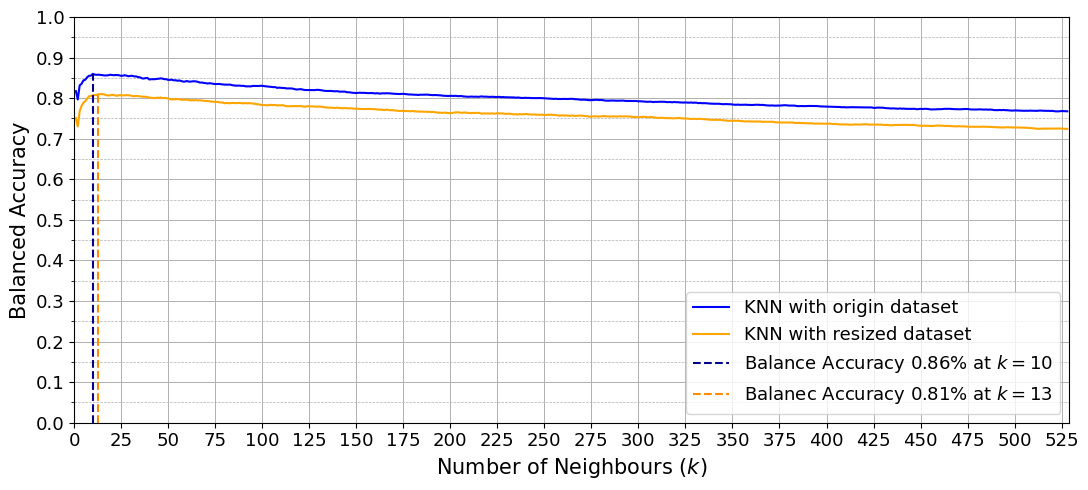

In [10]:
plot_find_hyperpara_process = plot_find_hyperparameter_process(origin_hyperparam_k_scores['balanced_accuracy'], resized_hyperparam_k_scores['balanced_accuracy'], resized_hyperparam_k_scores['k'])
plot_find_hyperpara_process.savefig( result_dir_path / 'find_hyperpara_process_knn_origin_resized.pdf')